## Homework 2 A1: Predicting Car Price
#### By Pattranit Teerakoson (st123052)

## A1: Task 1 Experiment Preparing the datasets 

Download the Car Price dataset from Google classroom. Perform loading, EDA, preprocessing, model selection, · · · , inference. Grade will be given based on the how well
you adhere to best practices. There are some important coding considerations:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Download Dataset
df = pd.read_csv('../dataset/Cars.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


1.1 For the feature owner, map First owner to 1, ..., Test Drive Car to 5

In [5]:
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [6]:
#rename owner lows
df['owner'].replace({
        'First Owner':1,
        'Second Owner':2,
        'Third Owner':3,
        'Fourth & Above Owner':4,
        'Test Drive Car':5
    }, inplace=True)

In [7]:
df['owner'] = df['owner'].astype(int)

In [8]:
df["owner"].unique()

array([1, 2, 3, 4, 5])

1.2 For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different
mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

In [9]:
#CODE กระจ๋อย
#newCNG = df.where(df["fuel"] == 'CNG')
#newCNG
#selected_rows = newCNG[~newCNG['fuel'].isnull()]
#selected_rows
df_1= df[df['fuel'] != 'CNG']
df_2= df_1[df_1['fuel'] != 'LPG']

In [10]:
df_2["fuel"].unique()

array(['Diesel', 'Petrol'], dtype=object)

1.3 For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
Hint: use df.mileage.str.split

In [11]:
df_2['mileage'] = df_2['mileage'].str.split().str[0]
df_2['mileage'] = pd.to_numeric(df_2['mileage'], errors='coerce')

1.4 For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

In [12]:
df_2['engine'] = df_2['engine'].str.split().str[0]
df_2['engine'] = pd.to_numeric(df_2['engine'], errors='coerce')

1.5 Do the same for max power

In [13]:
df_2['max_power'] = df_2['max_power'].str.split().str[0]
df_2['max_power'] = pd.to_numeric(df_2['max_power'], errors='coerce')

1.6 For the feature brand, take only the first word and remove the rest

In [14]:
df_2['name'] = df_2['name'].str.split().str[0]
df_2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


1.7 Drop the feature torque, simply because Chaky’s company does not understand well about it

In [15]:
#df.drop(columns=['torque'])
df_2 = df_2.drop('torque', axis=1)
df_2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int32  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(4), int32(1), int64(3), object(4)
memory usage: 784.5+ KB


1.8 You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to
involve this, we will simply delete all samples related to it

In [17]:
newCar = df_2.where(df["owner"] == 5)
selected_rows = newCar[~newCar['owner'].isnull()]
selected_rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4383,Volkswagen,2019.0,1350000.0,5400.0,Diesel,Dealer,Manual,5.0,22.27,1498.0,108.60,5.0
4950,Audi,2019.0,6223000.0,7800.0,Petrol,Dealer,Automatic,5.0,15.26,1798.0,187.74,5.0
4951,Audi,2019.0,5923000.0,11500.0,Petrol,Dealer,Automatic,5.0,15.26,1798.0,187.74,5.0
4952,Audi,2019.0,6523000.0,23600.0,Petrol,Dealer,Automatic,5.0,15.26,1798.0,187.74,5.0
6220,Honda,2019.0,2000000.0,24857.0,Petrol,Dealer,Automatic,5.0,16.50,1799.0,139.46,5.0


In [18]:
df_3= df_2[df_2['owner'] != '5']

1.9 Since selling price is a big number, it can cause your prediction to be very unstable. One trick
is to first transform the label using log transform, i.e.,

In [19]:
y = np.log(df_3['selling_price'])
y

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8033, dtype: float64

2.0 During inference/testing, you have to transform your predicted y backed before comparing with y
test, i.e.,

In [20]:
pred_y = np.exp(y)
pred_y

0       450000.0
1       370000.0
2       158000.0
3       225000.0
4       130000.0
          ...   
8123    320000.0
8124    135000.0
8125    382000.0
8126    290000.0
8127    290000.0
Name: selling_price, Length: 8033, dtype: float64

In [21]:
df_3['selling_price'] = np.log(df_3['selling_price'])

In [22]:
df_3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,12.676076,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,11.813030,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,12.853176,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,12.577636,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


### A1: Task 2

**Task 2**. Report - In the end of the notebook, please write a 2-3 paragraphs summary deeply discussing
and analysing the results. Possible points of discussion:

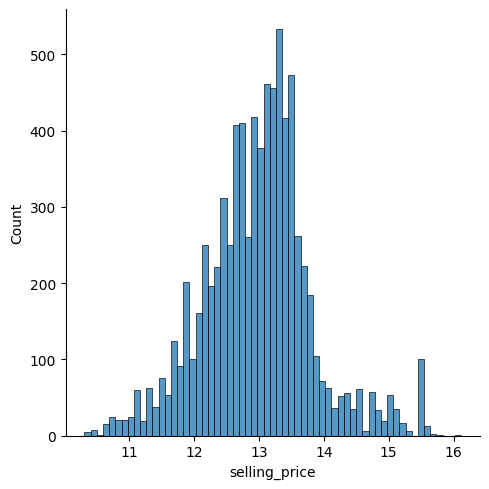

In [23]:
sns.displot(data = df_3, x = 'selling_price')

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_3["seller_type"] = le.fit_transform(df_3["seller_type"])
#df["selling_price"].unique()
#le.classes_

In [25]:
le.classes_
le.transform(['Dealer', 'Individual', 'Trustmark Dealer'])

array([0, 1, 2])

In [26]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   float64
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   int32  
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int32  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(5), int32(2), int64(2), object(3)
memory usage: 1011.1+ KB


In [27]:
#ถ้าคิดว่าไม่ใช้ให้ Drop เลย
df_3 = df_3.drop(['fuel', 'transmission','owner','name'],axis=1)

<Axes: >

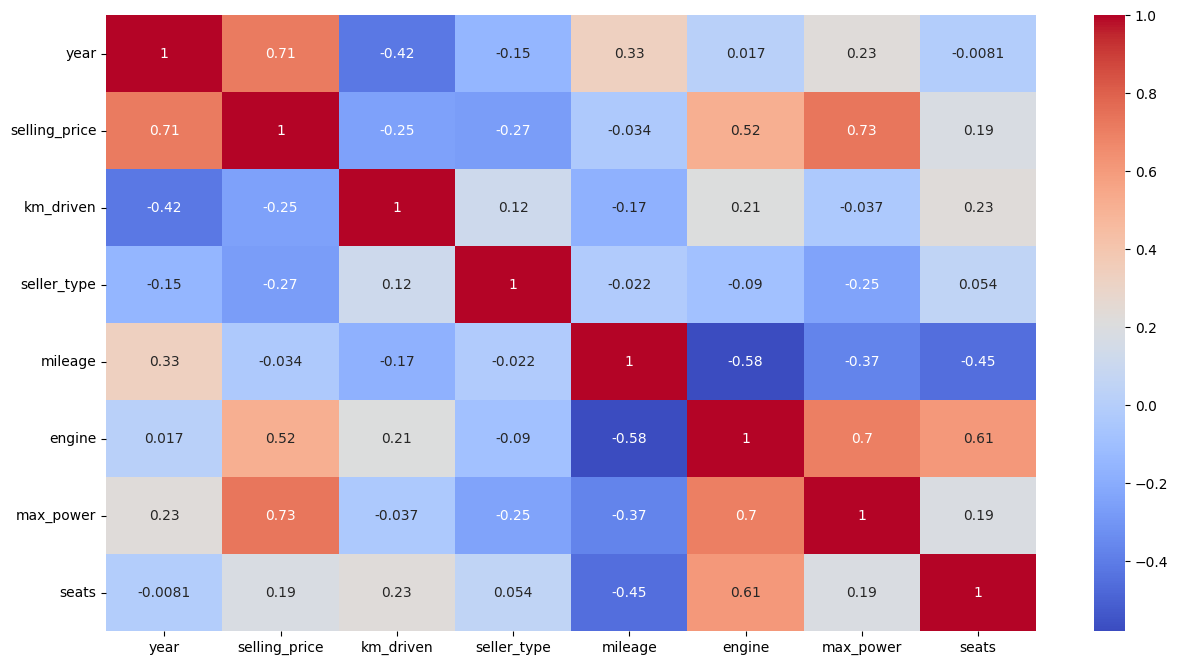

In [28]:
plt.figure(figsize = (15,8))
sns.heatmap(df_3.corr(), annot=True, cmap="coolwarm") 

2.1 Which features are important? Which are not? Why?

ANS: The feature are important are max_power, engine and years. 

you can check the the best feature form ppscore table in below: hight score means very important feature more than low score.

<Axes: xlabel='x', ylabel='y'>

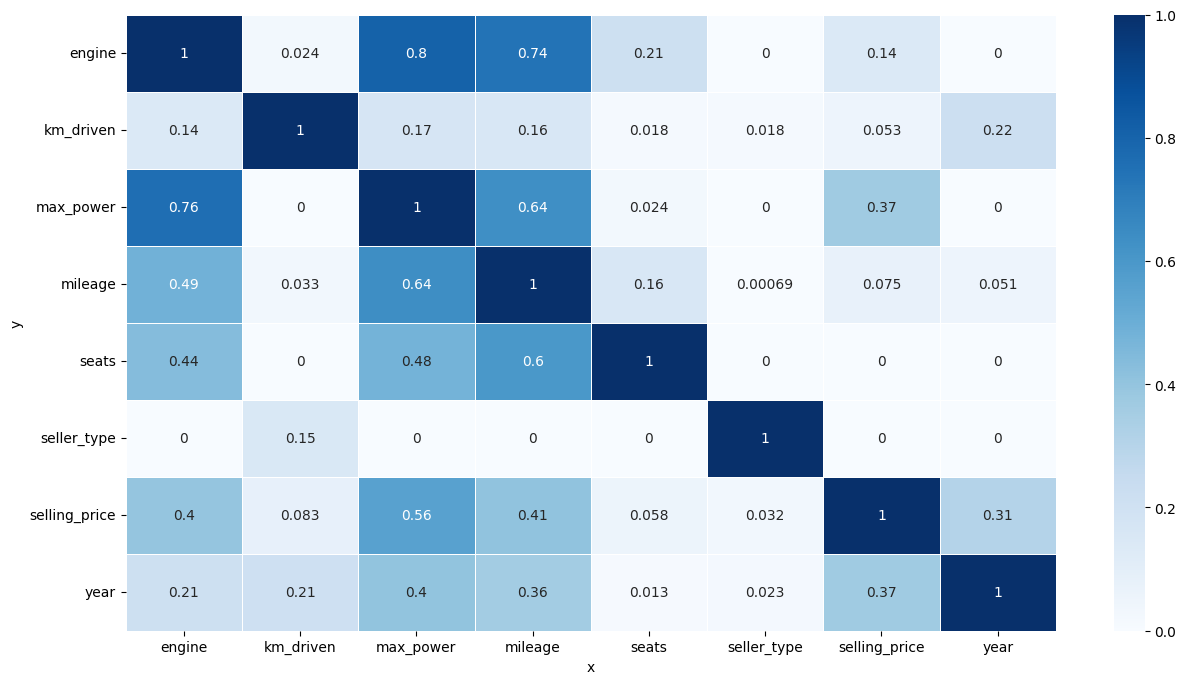

In [29]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df_3.copy()
#dfcopy.drop(['country', 'year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

2.2 Which algorithm performs well? Which does not? Why? (here, you haven’t learned about any
algorithms yet, but you can search online a bit and start building an intuition)

ANS: I try to compare 4 model (algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]) 
Algorithm is perform well is  Random-Forest Regressor Because this model have the best Mean Score: -0.05946266469462726

In [30]:
from sklearn.model_selection import train_test_split
#x is our strong features
X = df_3[['max_power', 'engine', 'year']]

#y is simply the life expectancy col
y = df_3["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [31]:
#check all the lost number
X_train[['max_power', 'engine', 'year']].isna().sum()

max_power    148
engine       153
year           0
dtype: int64

In [32]:
X_test[['max_power', 'engine', 'year']].isna().sum()

max_power    60
engine       61
year          0
dtype: int64

In [33]:
y_train.isna().sum()

0

In [34]:
X_train['max_power']

1495     62.10
5818    100.00
1281     90.00
1421     90.00
7173     81.83
         ...  
5289     81.80
5456       NaN
865      88.76
7696     46.30
7361       NaN
Name: max_power, Length: 5623, dtype: float64

In [35]:
import pandas as pd


# Calculate the value counts
value_counts = X_train['max_power'].value_counts()

# Get the maximum count
max_count = value_counts.max()

print("Maximum Count:", max_count)
value_counts

Maximum Count: 267


74.00     267
81.80     156
88.50     141
67.00     121
88.70     113
         ... 
68.40       1
174.57      1
139.46      1
86.79       1
265.00      1
Name: max_power, Length: 289, dtype: int64

In [36]:
print(X_train['max_power'].median())
print(X_train['engine'].median())
X_train['year'].mode()

82.0
1248.0


0    2017
Name: year, dtype: int64

In [37]:
#let's fill the training set first!
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['year'].fillna(X_train['year'].median(), inplace=True)

In [38]:
X_train

,max_power,engine,year
1495,62.100000,2523.0,2013
5818,100.000000,1493.0,2012
1281,90.000000,1248.0,2010
1421,90.000000,1396.0,2010
7173,81.830000,1197.0,2015
...,...,...,...
5289,81.800000,1197.0,2014
5456,92.014809,1248.0,2006
865,88.760000,1248.0,2015
7696,46.300000,796.0,2010


In [39]:
X_train[['max_power', 'engine', 'year']].isna().sum()

max_power    0
engine       0
year         0
dtype: int64

In [40]:
X_test['max_power'].fillna(X_test['max_power'].mean(), inplace=True)
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['year'].fillna(X_test['year'].median(), inplace=True)

In [41]:
X_test[['max_power', 'engine', 'year']].isna().sum()

max_power    0
engine       0
year         0
dtype: int64

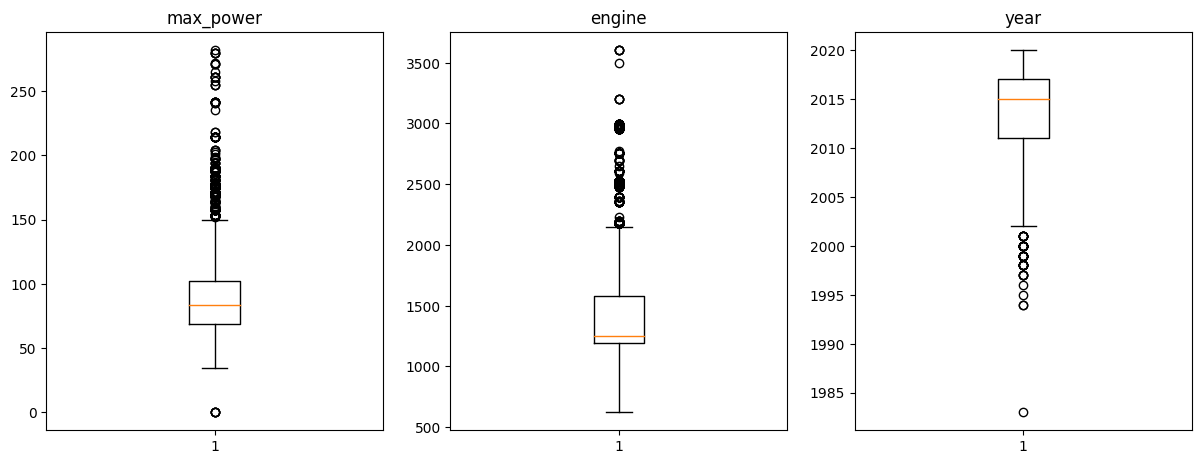

In [42]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'engine':2,'year':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [43]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [44]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5623, 3)
Shape of X_test:  (2410, 3)
Shape of y_train:  (5623,)
Shape of y_test:  (2410,)


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from time import time

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [46]:
y_test

7497    12.524526
4171    12.899220
3069    12.676076
3841    13.384728
322     13.161584
          ...    
1010    13.304685
4857    12.072541
4381    12.886641
560     12.611538
6919    11.156251
Name: selling_price, Length: 2410, dtype: float64

In [47]:
import pandas as pd
import numpy as np

# Define custom bin edges based on the maximum values from both y_train and y_test
bin_edges = [10, 11.5, 13, 14.5, 16.5]  # Adjust these as needed

# Use pd.cut with specified bin edges and labels
y_train_cut2 = pd.cut(y_train, bins=bin_edges, labels=[0, 1, 2, 3], ordered=False)
y_test_cut2 = pd.cut(y_test, bins=bin_edges, labels=[0, 1, 2, 3], ordered=False)

In [48]:
y_test.min(), y_test.max()

(10.433615678556617, 16.11809565095832)

In [49]:
y_train.min(), y_train.max()

(10.308919326755392, 15.789591583986283)

In [50]:
y_train_cut2

1495    1
5818    1
1281    1
1421    1
7173    1
       ..
5289    1
5456    1
865     2
7696    1
7361    1
Name: selling_price, Length: 5623, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [51]:
import pandas as pd
import numpy as np

bin_edges = [10, 12, 13, 14, 16.5]  # Adjust these as needed

y_train_cut = pd.cut(y_train, bins=bin_edges, labels=[0, 1, 2, 3], ordered=False)
y_test_cut = pd.cut(y_test, bins=bin_edges, labels=[0, 1, 2, 3], ordered=False)

In [52]:
y_train_cut = y_train_cut.values
y_test_cut = y_test_cut.values

In [53]:
y_train_cut = np.array(y_train_cut)
y_test_cut = np.array(y_test_cut)

In [54]:
k = len(set(y_train_cut))
m = X_train.shape[0]
n = X_train.shape[1]

In [55]:
unique_classes, class_counts = np.unique(y_train_cut, return_counts=True)

# Print the results
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} ")

Class 0: 652 
Class 1: 2052 
Class 2: 2462 
Class 3: 457 


In [56]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Create an instance of the SMOTE class
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and transform the data to apply SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_cut)

In [57]:
unique_classes, class_counts = np.unique(y_train_resampled, return_counts=True)

# Print the results
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} ")

Class 0: 2462 
Class 1: 2462 
Class 2: 2462 
Class 3: 2462 


In [58]:
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
# os.environ["LOGNAME"] = "st123050-a3"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="st123050-a3")

<Experiment: artifact_location='mlflow-artifacts:/345735210583965692', creation_time=1696037423162, experiment_id='345735210583965692', last_update_time=1696037423162, lifecycle_stage='active', name='st123050-a3', tags={}>

In [59]:
import pandas as pd
class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
            
    def __init__(self,regularization, n=4, k=4, lr=0.0001,method='batch', num_epochs=2000, batch_size=254):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.regularization = regularization
        self.n = n
        self.num_class = k
        self.prev_step = 0
        self.moment = True

    def xaviar (self, size) :
        m = size
        lower , upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m))
        print(self.n, self.num_class)
        numbers = np.random.rand(self.n, self.num_class)
        scaled = lower + numbers * (upper - lower)
        return scaled
    
    def fit(self, weight_init,moment ,X_train, y_train):
        self.val_loss_old = np.infty
        if weight_init == 'zero' :
            self.theta = np.zeros(X_train.shape[1])
        else :
            self.theta = self.xaviar(X_train.shape[1])  
        if moment == True :
            self.moment = True
        else : 
            self.moment = False        
        params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
        mlflow.log_params(params=params)
        for epoch in range(self.num_epochs):
            
            if self.method == 'sto':
                for batch_idx in range(X_train.shape[0]):
                    X_method_train = X_train[batch_idx].reshape(1, -1)
                    y_method_train = y_train[batch_idx] 
                    y_method_train = np.array([y_method_train])
                    train_loss = self._train(X_method_train, y_method_train)
            elif self.method == 'mini':
                for batch_idx in range(0, X_train.shape[0], self.batch_size):
                    X_method_train = X_train[batch_idx:batch_idx+self.batch_size, :]
                    y_method_train = y_train[batch_idx:batch_idx+self.batch_size]
                    train_loss = self._train(X_method_train, y_method_train)
            else:
                X_method_train = X_train
                y_method_train = y_train
                train_loss = self._train(X_method_train, y_method_train)

            if epoch % 500 == 0 :
                print(f"loss at epoch {epoch} = {train_loss}")  

    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = X.T @(yhat - y) + self.regularization.derivation(self.theta)
        self.theta = self.theta - (self.lr * grad)
        if self.method == 'sto' :
            y = np.array([y])
        return self.loss(y, yhat)

    def loss(self, ytrue, ypred) :
        return - np.sum(ytrue * np.log(self.softmax(ypred))) / ytrue.shape[0]
    
    def softmax(self, h_theta) :
        return np.exp(h_theta) / np.sum(np.exp(h_theta), axis=1, keepdims=True)

    def predict(self, X):
        return self.softmax(X @ self.theta)  
    
    def _coef(self):
        return self.theta[1:]  

    def _bias(self):
        return self.theta[0]

In [60]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class NormalP:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, theta):
        return 0    
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Lasso(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = RidgePenalty(0.8)
        super().__init__(self.regularization,4,4, lr, method)
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method)

class Normal(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = NormalP(l)
        super().__init__(self.regularization, lr, method)        


In [61]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [62]:
def encode(orig) :
    num_classes = np.max(orig) + 1
    result_array = np.zeros((orig.shape[0], num_classes))
    result_array[np.arange(orig.shape[0]), orig.flatten()] = 1
    return result_array

In [63]:
encoded_resample_y = encode(y_train_resampled)

In [64]:
y_train_cut

array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

In [65]:
encoded_y_test = encode(y_test_cut)

In [66]:
encoded_y_test

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [67]:
def accuracy(yhat, ytrue) :
    correct = 0
    for idx, v in enumerate(ytrue) :
        if v == yhat[idx] :
            correct += 1
    return  correct/len(yhat)       

def precision(yhat, ytrue, class_det) :
    tp = 0
    fp = 0
    for idx , a in enumerate(ytrue) :
        if yhat[idx] == class_det and a == class_det :
            tp += 1
        if yhat[idx] == class_det and a != class_det :
            fp += 1
    if tp + fp == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)        
    return precision

def recall(yhat, ytrue, class_det) :
    tp = 0
    fn = 0
    for idx , a in enumerate(ytrue) :
        if yhat[idx] == class_det and a == class_det :
            tp += 1
        if yhat[idx] != class_det and a == class_det :
            fn += 1
        if tp+fn == 0:
            recall = 0
        else :
            recall = tp/(tp+fn)

    return recall

def f1(prec, rec):
    if prec == 0 or rec == 0:
        return 0  # Handle the case where either precision or recall is zero
    return (2 * prec * rec) / (prec + rec)

def marco_precision(list_precise) :
    return np.array(list_precise).mean()
def marco_recall(list_recall) :
    return np.array(list_recall).mean()
def marco_f1(list_f1) :
    return np.array(list_f1).mean()

def weight_precision(list_precise) :
    return ( 0.2*list_precise[0] + 0.3*list_precise[1] + 0.2*list_precise[2] + 0.3*list_precise[3])
def weight_recall(list_recall) :
    return ( 0.2*list_recall[0] + 0.3*list_recall[1] + 0.2*list_recall[2] + 0.3*list_recall[3])
def weight_f1(list_f1) :
    return ( 0.2*list_f1[0] + 0.3*list_f1[1] + 0.2*list_f1[2] + 0.3*list_f1[3])

In [68]:
re = ["Ridge"]
lrs = [0.0003]
method_rr = ['mini']
init_method = ['xaviar']

for reg in re:
    for method in method_rr :
        for lr in lrs:        
            for init_w in init_method :
                # for moment in momentum :
                params = {"method": method,"lr": lr , "l": 0.2}
                mlflow.start_run(run_name=f"method-minibatch-lr-{params['lr']}-reg-{reg}")
                
                print("="*5, f"{reg}-{method}-lr={lr}--init_weight with {init_w} use mometum", "="*5)

                type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                model = type_of_regression(**params)  
                model.fit(init_method,False,X_train_resampled, encoded_resample_y)
                yhat = model.predict(X_test)
                losses = model.loss(encoded_y_test, yhat)
                yhat = np.argmax(yhat, axis=1)
                acc = accuracy(yhat,y_test_cut)
                y_pred = yhat
                y_true = y_test_cut
                precision_0 = precision(y_pred, y_true, 0)
                recall_0 = recall(y_pred, y_true, 0)
                f1_score_0 = f1(precision_0, recall_0)
                support_0 = np.sum(y_true == 0)
                print('cc')

                precision_1 = precision(y_pred, y_true, 1)
                recall_1 = recall(y_pred, y_true, 1)
                f1_score_1 = f1(precision_1, recall_1)
                support_1 = np.sum(y_true == 1)

                precision_2 = precision(y_pred, y_true, 2)
                recall_2 = recall(y_pred, y_true, 2)
                f1_score_2 = f1(precision_2, recall_2)
                support_2 = np.sum(y_true == 2)

                precision_3 = precision(y_pred, y_true, 3)
                recall_3 = recall(y_pred, y_true, 3)
                f1_score_3 = f1(precision_3, recall_3)
                support_3 = np.sum(y_true == 3)

                correct_predictions = sum(1 for pred, true in zip(y_pred, y_true) if pred == true)
                accuracy_total = correct_predictions / len(y_true)

                macro_avg_precision = marco_precision([precision_0,precision_1,precision_2, precision_3])
                macro_avg_recall = marco_recall([recall_0,recall_1,recall_2 , recall_3])
                macro_avg_f1_score = marco_f1([f1_score_0, f1_score_1, f1_score_2, f1_score_3])
                macro_avg_support = len(y_true)

                weighted_avg_precision = weight_precision([precision_0,precision_1,precision_2, precision_3])
                weighted_avg_recall = weight_recall([recall_0,recall_1,recall_2 , recall_3])
                weighted_avg_f1_score = weight_f1([f1_score_0, f1_score_1, f1_score_2, f1_score_3])
                weighted_avg_support = len(y_true)
                mlflow.log_metric(key="test_loss", value=losses)
                mlflow.log_metric(key="accuracy", value=acc)
                mlflow.log_metric(key="f1-class0", value=f1_score_0)
                mlflow.log_metric(key="f1-class1", value=f1_score_1)
                mlflow.log_metric(key="f1-class2", value=f1_score_2)
                mlflow.log_metric(key="f1-class3", value=f1_score_3)
                mlflow.log_metric(key="f1-marco", value=macro_avg_f1_score)
                mlflow.log_metric(key="f1-weight", value=weighted_avg_f1_score)
                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)
                mlflow.end_run()

===== Ridge-mini-lr=0.0003--init_weight with xaviar use mometum =====
4 4
loss at epoch 0 = 0.8640486240464177
loss at epoch 500 = 0.824054986148013
loss at epoch 1000 = 0.8240549861477585
loss at epoch 1500 = 0.8240549861477584
cc


In [69]:
a = model.predict(X_test)

In [128]:
y_test_cut

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [326]:
import pickle as pkl

pkl.dump(X_train_resampled, open('./x_train.pkl', 'wb'))
pkl.dump(encoded_resample_y, open('./y_train.pkl', 'wb'))


In [65]:
pdd = model.predict(X_train_resampled)
model.loss(encoded_resample_y, pdd)

1.8428577632022782

In [148]:
y_train_resampled.shape

(10304,)

In [51]:
yhat = np.array([[5], [5], [5]])
ytrue = np.array([[5], [5], [5]])

In [137]:
np.argmax(a, axis=1)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [139]:
y_test

7497    12.524526
4171    12.899220
3069    12.676076
3841    13.384728
322     13.161584
          ...    
1010    13.304685
4857    12.072541
4381    12.886641
560     12.611538
6919    11.156251
Name: selling_price, Length: 2410, dtype: float64

In [70]:
accuracy(np.argmax(a, axis=1),y_test_cut)

0.7298755186721991

In [71]:
def precision(yhat, ytrue, class_det) :
    tp = 0
    fp = 0
    for idx , a in enumerate(ytrue) :
        if yhat[idx] == class_det and a == class_det :
            tp += 1
        if yhat[idx] == class_det and a != class_det :
            fp += 1
    if tp + fp == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)        
    return precision

In [72]:
def recall(yhat, ytrue, class_det) :
    tp = 0
    fn = 0
    for idx , a in enumerate(ytrue) :
        if yhat[idx] == class_det and a == class_det :
            tp += 1
        if yhat[idx] != class_det and a == class_det :
            fn += 1
        if tp+fn == 0:
            recall = 0
        else :
            recall = tp/(tp+fn)

    return recall

In [73]:
recal = recall(np.argmax(a, axis=1),y_test_cut, 4)

In [80]:
np.argmax(a, axis=1)[2000], y_test_cut[2000]

(2, 2)

In [85]:
precision(np.argmax(a, axis=1),y_test_cut, 3)

0.4603174603174603

In [86]:
def f1(prec, rec):
    if prec == 0 or rec == 0:
        return 0  # Handle the case where either precision or recall is zero
    return (2 * prec * rec) / (prec + rec)

In [87]:
def marco_precision(list_precise) :
    return np.array(list_precise).mean()
def marco_recall(list_recall) :
    return np.array(list_recall).mean()
def marco_f1(list_f1) :
    return np.array(list_f1).mean()

In [88]:
def weight_precision(list_precise) :
    return ( 0.2*list_precise[0] + 0.3*list_precise[1] + 0.2*list_precise[2] + 0.3*list_precise[3])
def weight_recall(list_recall) :
    return ( 0.2*list_recall[0] + 0.3*list_recall[1] + 0.2*list_recall[2] + 0.3*list_recall[3])
def weight_f1(list_f1) :
    return ( 0.2*list_f1[0] + 0.3*list_f1[1] + 0.2*list_f1[2] + 0.3*list_f1[3])

In [89]:
weight_recall([1,1,1,1])

1.0

In [90]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2, 3, 3]
y_pred = [0, 0, 2, 2, 1, 2, 3]
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(y_test_cut,np.argmax(a, axis=1), target_names=target_names ))


              precision    recall  f1-score   support

     class 0       0.28      0.93      0.44        88
     class 1       0.85      0.64      0.73      1085
     class 2       0.82      0.78      0.80      1118
     class 3       0.46      0.97      0.63       119

    accuracy                           0.73      2410
   macro avg       0.60      0.83      0.65      2410
weighted avg       0.80      0.73      0.75      2410



In [92]:
y_true = y_test_cut
y_pred = np.argmax(a, axis=1)

In [97]:
precision_0 = precision(y_pred, y_true, 0)
recall_0 = recall(y_pred, y_true, 0)
f1_score_0 = f1(precision_0, recall_0)
support_0 = np.sum(y_true == 0)
print('cc')

precision_1 = precision(y_pred, y_true, 1)
recall_1 = recall(y_pred, y_true, 1)
f1_score_1 = f1(precision_1, recall_1)
support_1 = np.sum(y_true == 1)

precision_2 = precision(y_pred, y_true, 2)
recall_2 = recall(y_pred, y_true, 2)
f1_score_2 = f1(precision_2, recall_2)
support_2 = np.sum(y_true == 2)

precision_3 = precision(y_pred, y_true, 3)
recall_3 = recall(y_pred, y_true, 3)
f1_score_3 = f1(precision_3, recall_3)
support_3 = np.sum(y_true == 3)

correct_predictions = sum(1 for pred, true in zip(y_pred, y_true) if pred == true)
accuracy_total = correct_predictions / len(y_true)

macro_avg_precision = marco_precision([precision_0,precision_1,precision_2, precision_3])
macro_avg_recall = marco_recall([recall_0,recall_1,recall_2 , recall_3])
macro_avg_f1_score = marco_f1([f1_score_0, f1_score_1, f1_score_2, f1_score_3])
macro_avg_support = len(y_true)

weighted_avg_precision = weight_precision([precision_0,precision_1,precision_2, precision_3])
weighted_avg_recall = weight_recall([recall_0,recall_1,recall_2 , recall_3])
weighted_avg_f1_score = weight_f1([f1_score_0, f1_score_1, f1_score_2, f1_score_3])
weighted_avg_support = len(y_true)

print(f"     class 0       {precision_0:.2f}      {recall_0:.2f}      {f1_score_0:.2f}         {support_0}")
print(f"     class 1       {precision_1:.2f}      {recall_1:.2f}      {f1_score_1:.2f}         {support_1}")
print(f"     class 2       {precision_2:.2f}      {recall_2:.2f}      {f1_score_2:.2f}         {support_2}")
print(f"     class 3       {precision_3:.2f}      {recall_3:.2f}      {f1_score_3:.2f}         {support_3}")
print()
print(f"    accuracy                           {accuracy_total:.2f}         {len(y_true)}")  # support for accuracy is the total count
print(f"   macro avg       {macro_avg_precision:.2f}      {macro_avg_recall:.2f}      {macro_avg_f1_score:.2f}         {macro_avg_support}")
print(f"weighted avg       {weighted_avg_precision:.2f}      {weighted_avg_recall:.2f}      {weighted_avg_f1_score:.2f}         {weighted_avg_support}")

cc
     class 0       0.28      0.93      0.44         88
     class 1       0.85      0.64      0.73         1085
     class 2       0.82      0.78      0.80         1118
     class 3       0.46      0.97      0.63         119

    accuracy                           0.73         2410
   macro avg       0.60      0.83      0.65         2410
weighted avg       0.61      0.83      0.65         2410


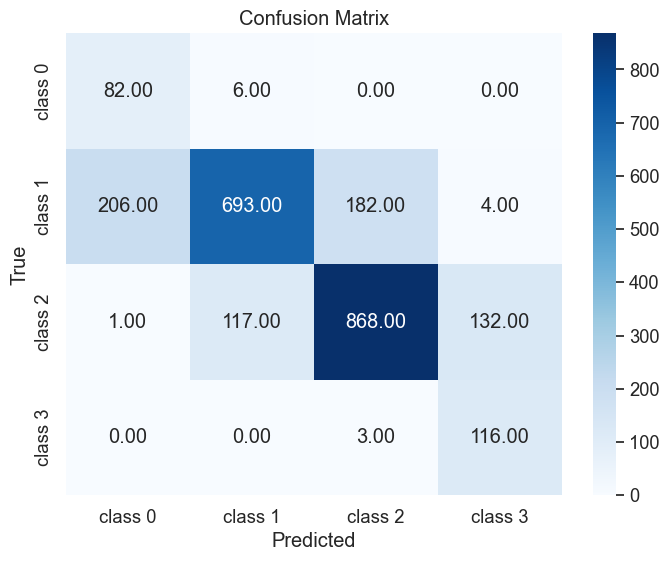

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


num_classes = len(np.unique(y_true))
confusion_matrix = np.zeros((num_classes, num_classes))
for i in range(len(y_true)):
    confusion_matrix[y_true[i]][y_pred[i]] += 1

class_labels = ["class 0", "class 1", "class 2", "class 3"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt=".2f",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
